# Лабораторная №2
#### Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

#### Задание:

1. Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)
2. Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:
    - обработку пропусков в данных;
    - кодирование категориальных признаков;
    - масштабирование данных.

# Melbourne Housing Snapshot

- Rooms: Number of rooms
- Price: Price in dollars
- Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.
- Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - - development site; o res - other residential.
- SellerG: Real Estate Agent
- Date: Date sold
- Distance: Distance from CBD
- Regionname: General Region (West, North West, North, North east …etc)
- Propertycount: Number of properties that exist in the suburb.
- Bedroom2 : Scraped # of Bedrooms (from different source)
- Bathroom: Number of Bathrooms
- Car: Number of carspots
- Landsize: Land Size
- BuildingArea: Building Size
- CouncilArea: Governing council for the area

In [23]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [24]:
data = pd.read_csv('melb_data.csv')

In [25]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


## Обработка пропусков в данных

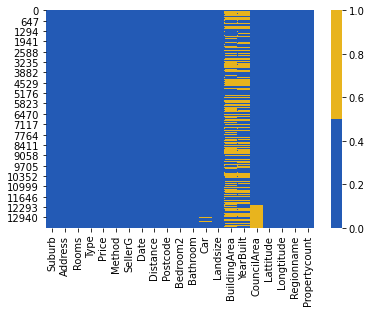

In [10]:
cols = data.columns
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#235AB5', '#E8B41E'] 
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

Рассмотрим числовые колонки с пропущенными значениями

In [11]:
total_count = data.shape[0]
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Car. Тип данных float64. Количество пустых значений 62, 0.46%.
Колонка BuildingArea. Тип данных float64. Количество пустых значений 6450, 47.5%.
Колонка YearBuilt. Тип данных float64. Количество пустых значений 5375, 39.58%.


/Users/nonpenguin/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/nonpenguin/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


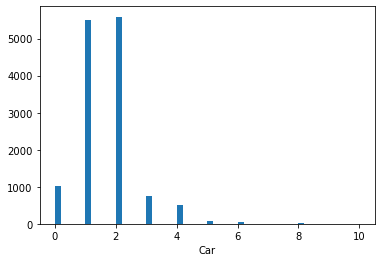

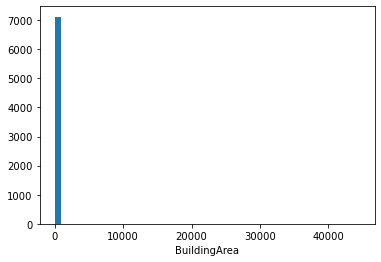

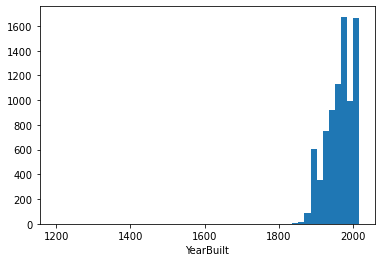

In [12]:
data_num = data[num_cols]
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

Выбросов нет, распределения одномодальные

In [15]:
data = data.fillna(data.mode())

Рассмотрим пропуски в категориальных данных

In [13]:
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка CouncilArea. Тип данных object. Количество пустых значений 1369, 10.08%.


In [16]:
data[:] = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(data)

In [17]:
data.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

Все пропуски в данных заполнены

## Кодирование категориальных признаков

Рассмотрим количество категорий в признаках типа object

In [25]:
total_count = data.shape[0]
num_cols = []
for col in data.columns: 
    dt = str(data[col].dtype)
    if (dt=='object'):
        num_cols.append(col)        
        print('Колонка {}. Количество категорий: {}'.format(col, data[col].unique().shape[0]))

Колонка Suburb. Количество категорий: 314
Колонка Address. Количество категорий: 13378
Колонка Type. Количество категорий: 3
Колонка Method. Количество категорий: 5
Колонка SellerG. Количество категорий: 268
Колонка Date. Количество категорий: 58
Колонка CouncilArea. Количество категорий: 33
Колонка Regionname. Количество категорий: 8


В признаках Suburb, Address, SellerG, CouncilArea слишком много категорий для OneHotEncoder, так что используем LabelEncoder.

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical1 = ['Suburb', 'Address', 'SellerG', 'CouncilArea']
for col in categorical1:
    data[col] = le.fit_transform(data[col])

Для остальных признаков используем OneHotEncoder

In [19]:
categorical2 = ['Type', 'Method', 'Regionname']

data = pd.concat([data, pd.get_dummies(data[categorical2], columns=categorical2, drop_first=True)],axis=1)
data.drop(categorical2, axis=1, inplace=True)

Дату обработаем отдельно

In [20]:
import datetime as dt

data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].map(dt.datetime.toordinal)

In [35]:
data.shape

(13580, 31)

## Масштабирование данных

In [21]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
data[:] = min_max_scaler.fit_transform(data)

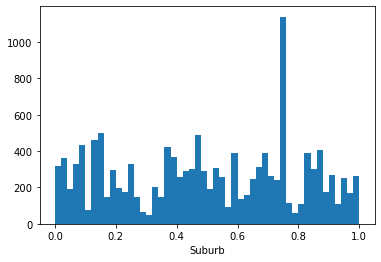

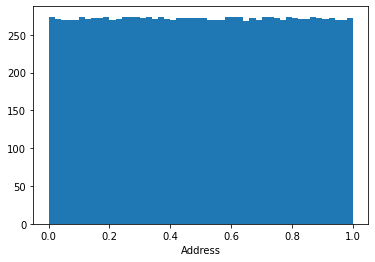

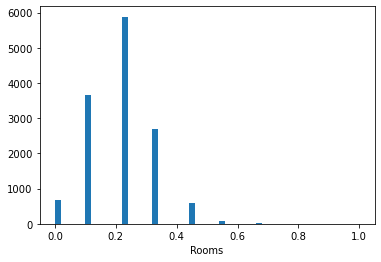

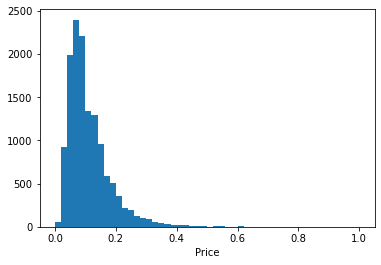

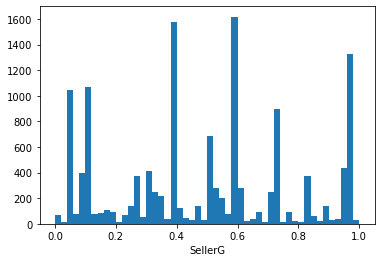

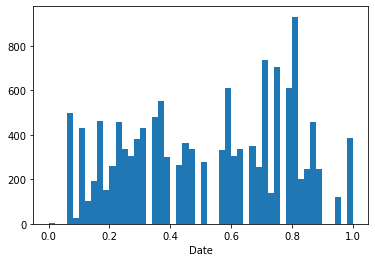

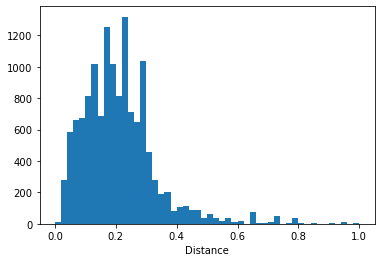

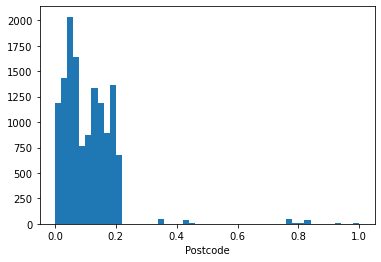

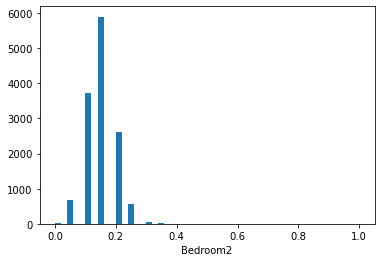

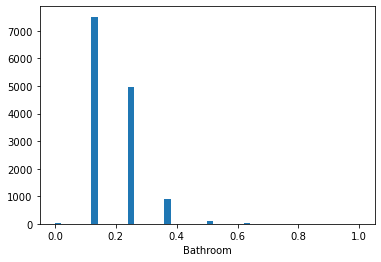

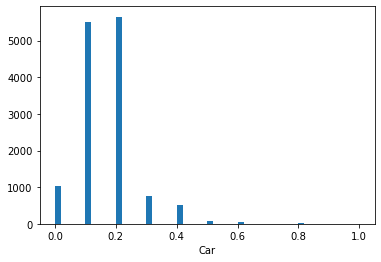

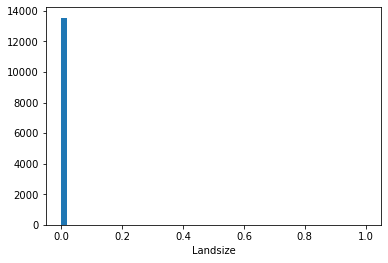

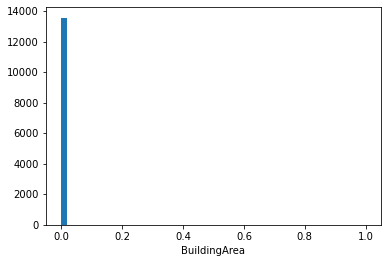

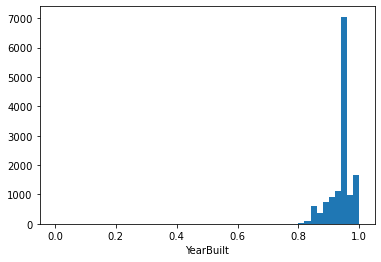

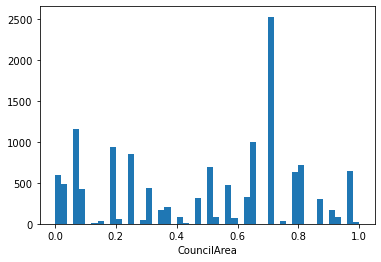

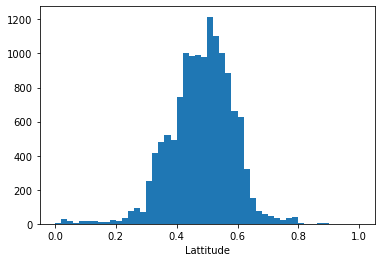

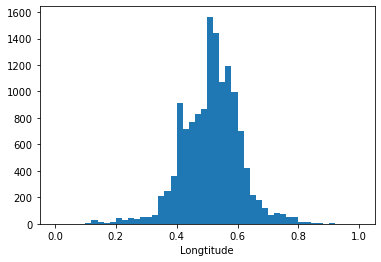

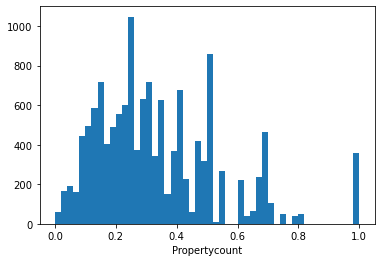

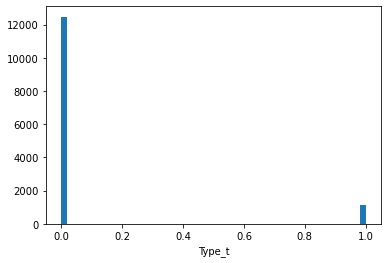

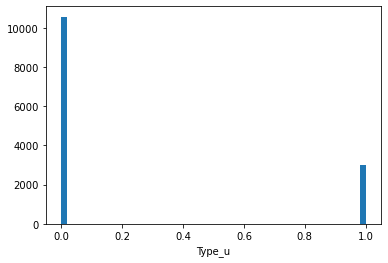

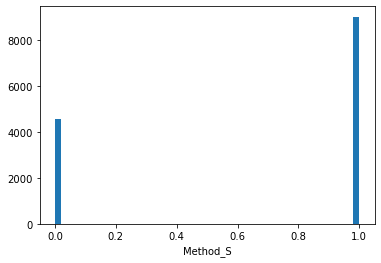

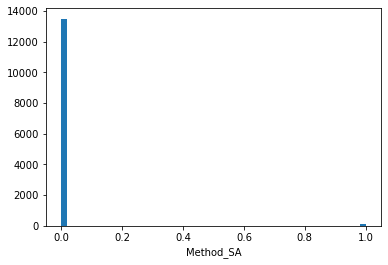

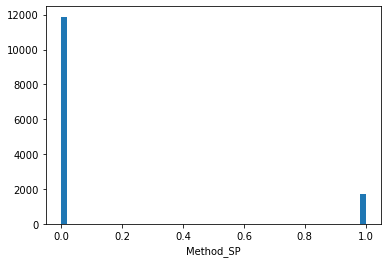

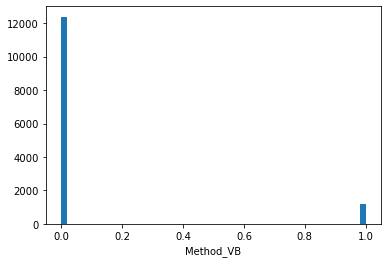

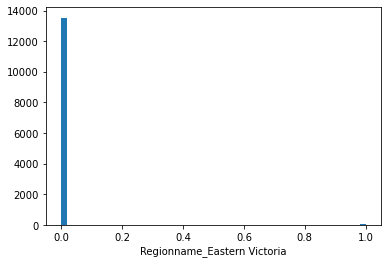

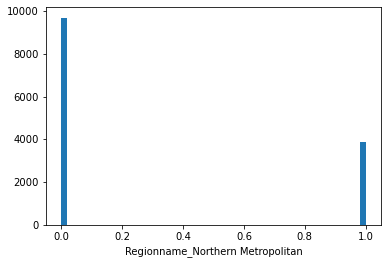

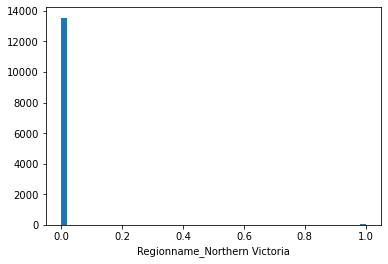

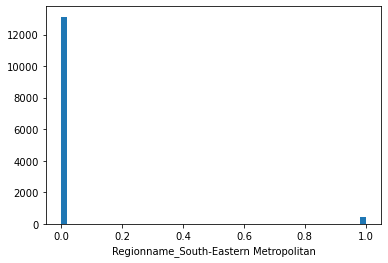

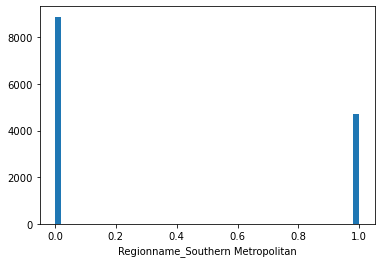

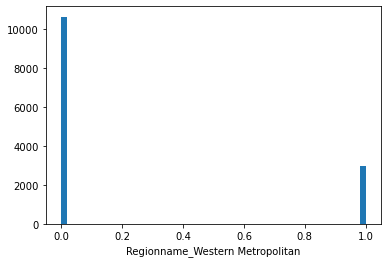

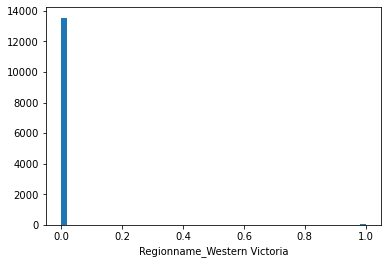

In [38]:
for col in data.columns:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

# 3 лабораторная

#### Подготовка обучающей и тестовой выборки, кросс-валидация и подбор гиперпараметров на примере метода ближайших соседей.

#### Задание:

1. Выберите набор данных (датасет) для решения задачи классификации или регрессии.
2. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
3. Обучите модель ближайших соседей для произвольно заданного гиперпараметра K. Оцените качество модели с помощью подходящих для задачи метрик.
4. Произведите подбор гиперпараметра K с использованием GridSearchCV и/или RandomizedSearchCV и кросс-валидации, оцените качество оптимальной модели. Желательно использование нескольких стратегий кросс-валидации.
5. Сравните метрики качества исходной и оптимальной моделей.

## Разделение выборки на обучающую и тестовую

In [22]:
%%capture
y = data['Price']
data.drop(['Price'], axis = 1)

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.25, random_state=23)

## Модель ближайших соседей для произвольно заданного гиперпараметра K

Выберем параметр 50

In [43]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score 

In [79]:
%%time
neigh = KNeighborsRegressor(n_neighbors=50)
neigh.fit(X_train, y_train)

prediction = neigh.predict(X_test)

CPU times: user 791 ms, sys: 2.94 ms, total: 794 ms
Wall time: 793 ms


In [94]:
print ("mean_absolute_error = {:f}".format(mean_absolute_error(y_test, prediction)))  
print ("mean_squared_error = {:f}".format(mean_squared_error(y_test, prediction, squared=False))) # RMSE сравнимо MAE
print ("median_absolute_error = {:f}".format(median_absolute_error(y_test, prediction))) # 0 - лучшее значение
print ("r2_score = {:f}".format(r2_score(y_test, prediction))) # 1 - лучшее значение

mean_absolute_error = 0.029946
mean_squared_error = 0.046587
median_absolute_error = 0.021470
r2_score = 0.575862


## Подбор гиперпараметра K

In [51]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve

Оценка качества модели с использованием кросс-валидации

In [52]:
scores = cross_val_score(KNeighborsRegressor(n_neighbors=50), 
                         data, y, 
                         cv=5)
scores, np.mean(scores)

(array([0.54788388, 0.58733528, 0.54792813, 0.55006166, 0.52367828]),
 0.5513774456972729)

Подбор гиперпараметров на основе решетчатого поиска и кросс-валидации

In [53]:
n_range = np.array(range(5,55,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}]

In [54]:
%%time
rand_search = RandomizedSearchCV(KNeighborsRegressor(), tuned_parameters, cv=RepeatedKFold(n_splits=3, n_repeats=3), scoring="r2")
rand_search.fit(data, y)

CPU times: user 1min 11s, sys: 119 ms, total: 1min 11s
Wall time: 1min 11s


RandomizedSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=3, random_state=None),
                   estimator=KNeighborsRegressor(),
                   param_distributions=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
                   scoring='r2')

In [56]:
rand_search.best_score_, rand_search.best_params_, rand_search.best_estimator_

(0.6581000916606975, {'n_neighbors': 5}, KNeighborsRegressor())

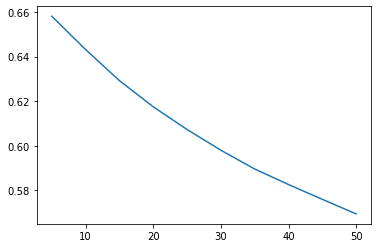

In [60]:
plt.plot(n_range, rand_search.cv_results_['mean_test_score'])

Уточним результаты с помощью GridSearchCV

In [57]:
%%time
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid=[{'n_neighbors': range(1,10,1)}], cv=RepeatedKFold(n_splits=3, n_repeats=3), scoring="r2")
grid_search.fit(data, y)

CPU times: user 45.3 s, sys: 52.3 ms, total: 45.4 s
Wall time: 45.4 s


GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=3, random_state=None),
             estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': range(1, 10)}], scoring='r2')

In [59]:
grid_search.best_score_, grid_search.best_params_, grid_search.best_estimator_

(0.6562228888988018, {'n_neighbors': 5}, KNeighborsRegressor())

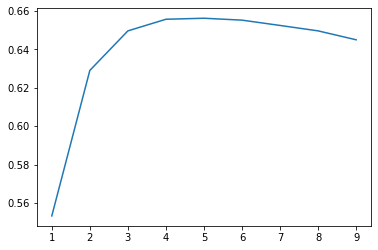

In [63]:
plt.plot(range(1,10,1), grid_search.cv_results_['mean_test_score'])

In [70]:
grid_search.best_estimator_.fit(X_train, y_train)
best_prediction1 = grid_search.best_estimator_.predict(X_train)
best_prediction2 = grid_search.best_estimator_.predict(X_test)

r2_score(y_train, best_prediction1), r2_score(y_test, best_prediction2)

(0.7857188039408536, 0.6682558405805463)

In [67]:
scores = cross_val_score(grid_search.best_estimator_, 
                         data, y, 
                         cv=RepeatedKFold(n_splits=3, n_repeats=3))
scores, np.mean(scores)

(array([0.6191961 , 0.68078657, 0.67071197, 0.67664658, 0.65997609,
        0.64285568, 0.68481807, 0.66114259, 0.63168748]),
 0.6586467918647686)

In [93]:
print("K = 50")
print ("mean_absolute_error = {:f}".format(mean_absolute_error(y_test, prediction)))  
print ("mean_squared_error = {:f}".format(mean_squared_error(y_test, prediction, squared=False))) # RMSE сравнимо MAE
print ("median_absolute_error = {:f}".format(median_absolute_error(y_test, prediction))) # 0 - лучшее значение
print ("r2_score = {:f}".format(r2_score(y_test, prediction))) # 1 - лучшее значение
print()
print("K = 5")
print ("mean_absolute_error = {:f}".format(mean_absolute_error(y_test, best_prediction2)))  
print ("mean_squared_error = {:f}".format(mean_squared_error(y_test, best_prediction2, squared=False))) # RMSE сравнимо MAE
print ("median_absolute_error = {:f}".format(median_absolute_error(y_test, best_prediction2))) # 0 - лучшее значение
print ("r2_score = {:f}".format(r2_score(y_test, best_prediction2))) # 1 - лучшее значение

K = 50
mean_absolute_error = 0.029946
mean_squared_error = 0.046587
median_absolute_error = 0.021470
r2_score = 0.575862

K = 5
mean_absolute_error = 0.026512
mean_squared_error = 0.041201
median_absolute_error = 0.018082
r2_score = 0.668256
